In [ ]:
#Graduate student:
# Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. 

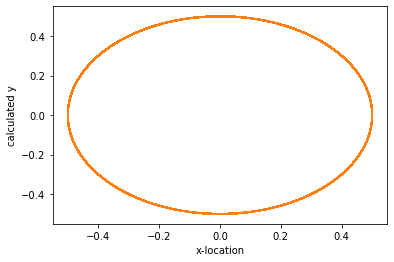

In [5]:
# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}

import numpy as np
import matplotlib.pyplot as plt

G=1.  #requirement
M=1.  # req
tend=200*np.pi  # required 100 end so just 100*2*pi (100*period)
h=0.01  # machine can't handle 0.001 steps
y=[0.5,0.,0.,np.sqrt(2)],[-0.5,0,0,-np.sqrt(2)] # req for ecc to be 0, just make vy1 = -vy2
t=0


# matrix looks like 
# C = [0,1,2,3]
# [x1,vx1,y1,vy1] R= [0]
# [x2,vx2,y2,vy2] R= [1]

# zeros are matrix of (2,4) REPLACE n with (2,4) in rk4 too!!

def f(t, y):
    f=np.zeros((2,4))
    r1= np.sqrt(y[0][0]*y[0][0]+y[0][2]*y[0][2])
    r2 = np.sqrt(y[1][0]*y[1][0]+y[1][2]*y[1][2])
    f[0][0]=y[0][1]
    f[0][1]=-G*M/r1/r1/r1*y[0][0]
    f[0][2]=y[0][3]
    f[0][3]=-G*M/r1/r1/r1*y[0][2]
    
    f[1][0]=y[1][1]
    f[1][1]=-G*M/r2/r2/r2*y[1][0]
    f[1][2]=y[1][3]
    f[1][3]=-G*M/r2/r2/r2*y[1][2]
    return f



def rk4(t, h, y):
    k1 = np.zeros((2,4))
    k2 = np.zeros((2,4))
    k3 = np.zeros((2,4))
    k4 = np.zeros((2,4))
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

# matrix looks like 
# C = [0,1,2,3]
# [x1,vx1,y1,vy1] R= [0]
# [x2,vx2,y2,vy2] R= [1]

# zeros are matrix of (2,4) REPLACE n with (2,4) in rk4 too!!


xp1=[]
yp1=[]
xp2=[]
yp2=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y)
    xp1=np.append(xp1,y[0][0])
    yp1=np.append(yp1,y[0][2])
    xp2=np.append(xp2,y[1][0])
    yp2=np.append(yp2,y[1][2])
    
    t = t+h

plt.plot(xp1,yp1,"-")
plt.plot(xp2,yp2,"-")
plt.xlabel("x-location")
plt.ylabel("calculated y")
plt.show()